In [1]:
# Third party imports
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reload library
from importlib import reload

# Local application imports
import smile.smile; reload(smile.smile)
from smile.smile import Population, PopulationList
from smile.smile import RegressionResultList, RegressionResult
from smile.smile import TraditionalMethodology, SmileMethodology, MixedMethodology
import smile.example_populations; reload(smile.example_populations)
import smile.helper; reload(smile.helper)
import smile.global_params; reload(smile.global_params);

In [3]:
# Settings
seed = 3 # chosen by fair dice roll. guaranteed to be random. https://xkcd.com/221/
np.random.seed(seed)
np.set_printoptions(edgeitems=30, linewidth=100000)

# Population generation

In [4]:
pop_noerror = smile.example_populations.get_default_pop(100)
pop_noerror.generate()

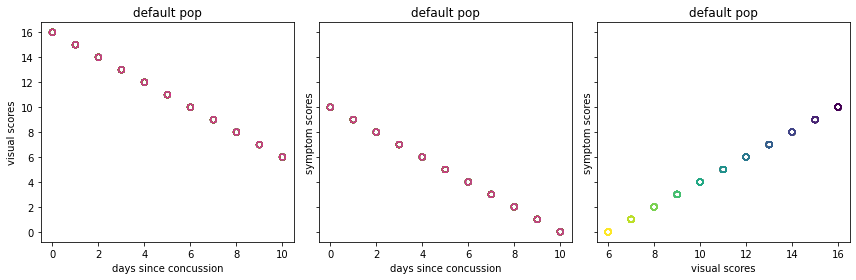

In [35]:
ncols = 3
nrows = 1

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=plt.figaspect(nrows/ncols), sharey=True)
npersons=None
ndays=11

pop_noerror.plot(axes[0], x='day', y='visual', viztype='points', vizcolor='person', npersons=npersons, ndays=ndays)
pop_noerror.plot(axes[1], x='day', y='symptom', viztype='points', vizcolor='person', npersons=npersons, ndays=ndays)
pop_noerror.plot(axes[2], x='visual', y='symptom', viztype='points', vizcolor='day', npersons=npersons, ndays=ndays)

plt.tight_layout()
plt.show()

# Study

## Comparing traditional to smile studies

In [12]:
pop = pop_noerror

In [31]:
methodologies2 = [TraditionalMethodology(title='trad short', sampling_days=[0, 5, 10]), 
                  SmileMethodology(title='smile', index_day=0, milestone_ratios=[0.7, 0.4, 0.1])]
methodologies2.append(MixedMethodology.from_methodologies(title='mixed', *methodologies2))

meth_pops2 = []
for methodology in methodologies2:
    meth_pops2.append(methodology.sample(pop))

C:\Users\Zachary V\Documents\Programming\stats\smile\smile\smile.py:850: UserWarning: There is a fixed sample day in [0, 5, 10] that is earlier than the FIRSTVISIT of 8
  warn(f"There is a fixed sample day in {sampling_days} that is earlier than the FIRSTVISIT of {FIRSTVISIT}")
C:\Users\Zachary V\Documents\Programming\stats\smile\smile\smile.py:886: UserWarning: The index day 0 is earlier than the FIRSTVISIT of 8
  warn(f"The index day {index_day} is earlier than the FIRSTVISIT of {FIRSTVISIT}")


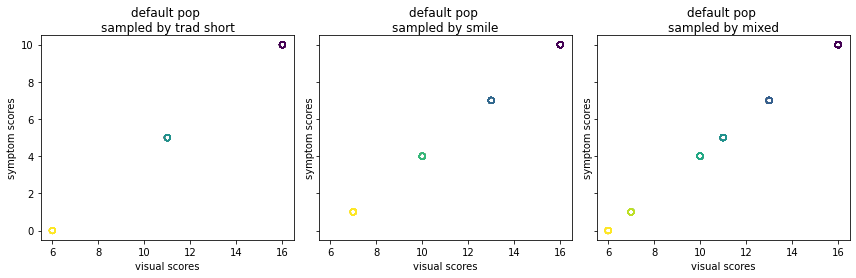

In [32]:
ncols = len(meth_pops2)
nrows = 1

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=plt.figaspect(nrows/ncols), sharex=True, sharey=True, squeeze=False)
npersons=None
ndays=None

for col in range(ncols):
    meth_pops2[col].plot(axes[0, col], x='visual', y='symptom', viztype='points', vizcolor='day', npersons=npersons, ndays=ndays)
    
plt.tight_layout()
plt.show()

In [37]:
methodologies3 = [TraditionalMethodology(title='trad short', sampling_days=[0, 5, 10]), 
                  SmileMethodology(title='smile', index_day=0, milestone_ratios=[0.7, 0.4, 0.1], smile_scorename='visual')]
methodologies3.append(MixedMethodology.from_methodologies(title='mixed', *methodologies3))

meth_pops3 = []
for methodology in methodologies3:
    meth_pops3.append(methodology.sample(pop))

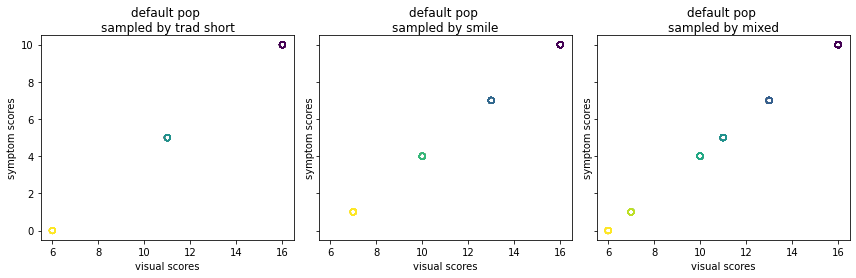

In [38]:
ncols = len(meth_pops3)
nrows = 1

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=plt.figaspect(nrows/ncols), sharex=True, sharey=True, squeeze=False)
npersons=None
ndays=None

for col in range(ncols):
    meth_pops3[col].plot(axes[0, col], x='visual', y='symptom', viztype='points', vizcolor='day', npersons=npersons, ndays=ndays)
    
plt.tight_layout()
plt.show()